<a href="https://colab.research.google.com/github/SalasNorman/workshop/blob/main/iris/iris_simpleDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Warning:** This code may not be ideal for deep learning, as the Iris dataset is simple and may lead to overfitting.

**Description:**
* Iris dataset is small and simple, making it not challenging enough for deep learning models.

* Overfitting risk: Deep learning models might memorize the data instead of learning generalizable patterns.

* Better alternatives: Simpler models (like decision trees or logistic regression) are more suitable for this problem.

* Generalization: Achieving 100% accuracy might indicate the model is not generalizing well to unseen data.

In [1]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/SalasNorman/workshop/main/iris/iris_dataset.csv"
df = pd.read_csv(url)

# Display first few rows of the dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
# Show basic info and check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# Extract features (X) and target (y)
X = df.drop(columns=['Species'])  # Dropping the target column
y = df['Species']  # The target column

# One-hot encode the target labels (species)
y_one_hot = pd.get_dummies(y).values

# Scale the features (important for neural networks)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_one_hot, test_size=0.2, random_state=42)

# Check the shapes to ensure everything is correct
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 5) (30, 5) (120, 3) (30, 3)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Function to create the model with Dropout
def create_model():
    model = Sequential()

    # Input layer with 64 neurons and ReLU activation
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

    # Dropout layer to prevent overfitting
    model.add(Dropout(0.5))  # 50% of neurons will be randomly dropped out

    # Hidden layer with 32 neurons
    model.add(Dense(32, activation='relu'))

    # Output layer with 3 neurons (one for each class) and softmax activation
    model.add(Dense(3, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [5]:
# Create the model
model = create_model()

# Set up EarlyStopping callback (monitor the validation loss)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test), callbacks=[early_stopping])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.4773 - loss: 1.1297 - val_accuracy: 0.9667 - val_loss: 0.8652
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5417 - loss: 0.8867 - val_accuracy: 0.9000 - val_loss: 0.6343
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8205 - loss: 0.6913 - val_accuracy: 0.9000 - val_loss: 0.4849
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8574 - loss: 0.5679 - val_accuracy: 0.9000 - val_loss: 0.3823
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8683 - loss: 0.4628 - val_accuracy: 1.0000 - val_loss: 0.3023
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8409 - loss: 0.3899 - val_accuracy: 1.0000 - val_loss: 0.2435
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9180 - loss: 0.3354 - val_accuracy: 1.0000 - val_loss: 0.2021
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9296 - loss: 0.2763 - val_accuracy: 1.0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 4.2734e-04
Test Accuracy: 100.00%


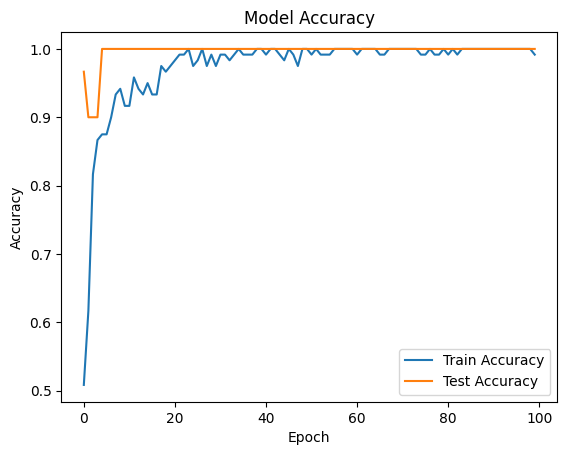

In [6]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Plot the training and validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()